In [ ]:
# Import the pandas library with the alias pd
import pandas as pd

In [ ]:
# Use the pd.read_csv() function to read the CSV file into a DataFrame
# Replace "SampleSuperstore.csv" with the actual path or URL of your CSV file
df = pd.read_csv("SampleSuperstore.csv")

# The resulting DataFrame, df, now contains the data from the CSV file
# You can use various DataFrame operations and methods on df to analyze and manipulate the data

In [ ]:
print("Dataset contains {} row and {} columns".format(df.shape[0],df.shape[1]))
#print no of rows and columns

Dataset contains 9994 row and 13 columns


In [ ]:
# Use the head() method on the DataFrame df to display the first few rows of the data
# By default, head() shows the first 5 rows, but you can specify a different number inside the parentheses

df_head = df.head()

# The resulting df_head DataFrame now contains the first few rows of the original DataFrame df
# You can print or further analyze df_head to get a quick overview of the data
print(df_head)


        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [ ]:
# Use the isnull() method on the DataFrame df to create a boolean DataFrame
# The boolean DataFrame has True where the values are missing (null or NaN), and False otherwise
missing_values = df.isnull()

# Use the sum() method on the boolean DataFrame to count the number of True values (missing values) in each column
# The result is a Series where each element represents the count of missing values in the corresponding column
missing_counts = missing_values.sum()

# The resulting missing_counts Series contains the count of missing values for each column in the DataFrame df
# You can print or further analyze missing_counts to understand the extent of missing data in your dataset
print(missing_counts)


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [ ]:
# Use the info() method on the DataFrame df to print a concise summary of the DataFrame
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# Use the describe() method on the DataFrame df to generate descriptive statistics of numeric columns
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Use the sum() method on the boolean Series to count the number of True values (duplicated rows)
# The result is the total count of duplicated rows in the DataFrame
df.duplicated().sum()

17

In [ ]:
# Use the drop() method on the DataFrame df to remove the 'Postal Code' column
# The axis=1 parameter specifies that we are dropping a column (axis=0 is for dropping rows)
data = df.drop('Postal Code' , axis=1)


In [ ]:
# Use the unique() method on the 'Region' column of the DataFrame 'data'
# The unique() method returns an array of unique values in the specified column

data['Region'].unique()


array(['South', 'West', 'Central', 'East'], dtype=object)

<Axes: xlabel='Region'>

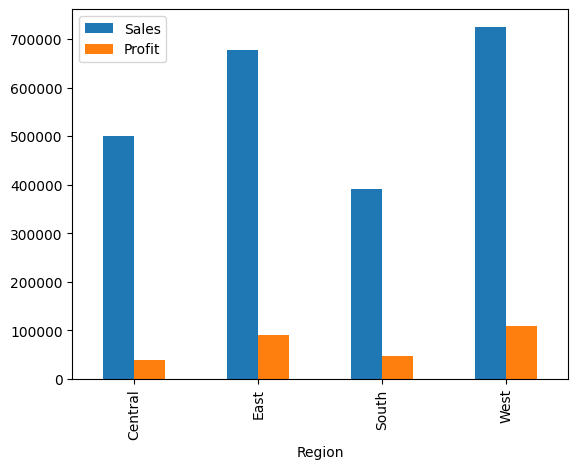

In [ ]:

# Use the groupby() method on the 'Region' column of the DataFrame 'data' to group data by regions
# Then, use the sum() method to calculate the total sales and profit for each region
# Finally, select the 'Sales' and 'Profit' columns and create a new DataFrame using pd.DataFrame()

pd.DataFrame(data.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

In [ ]:
# Calculate the correlation matrix for numeric attributes ('Sales', 'Quantity', 'Discount', 'Profit') in the DataFrame 'data'
attributes = ['Sales', 'Quantity', 'Discount', 'Profit']
numeric_data = data[attributes].apply(pd.to_numeric, errors='coerce')
correlation_matrix = numeric_data.corr()
correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


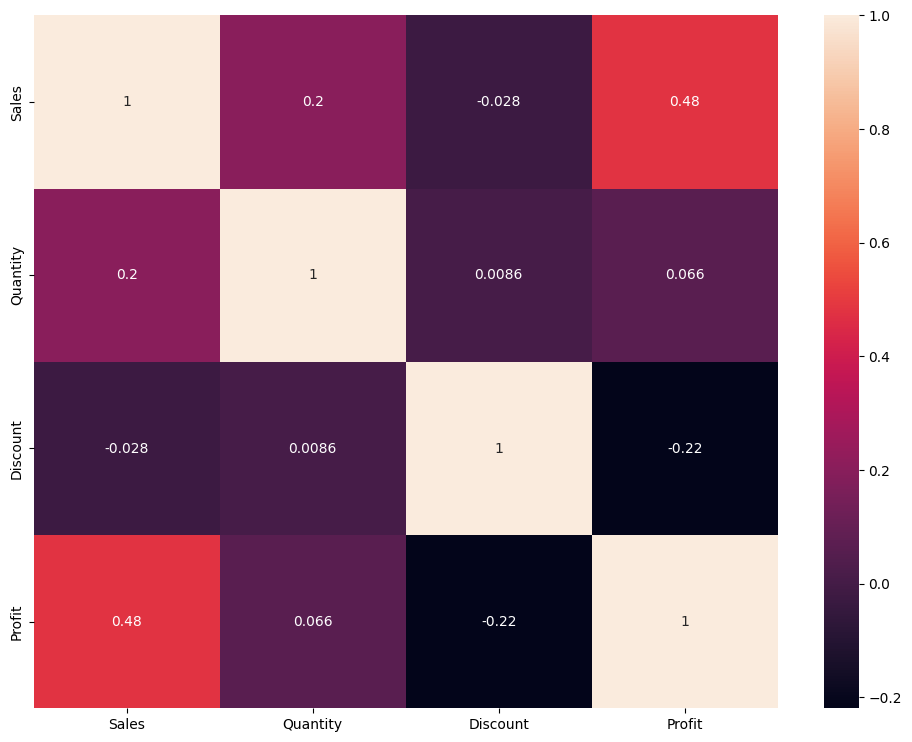

In [ ]:
# Create a heatmap to visualize the correlation matrix with annotations using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


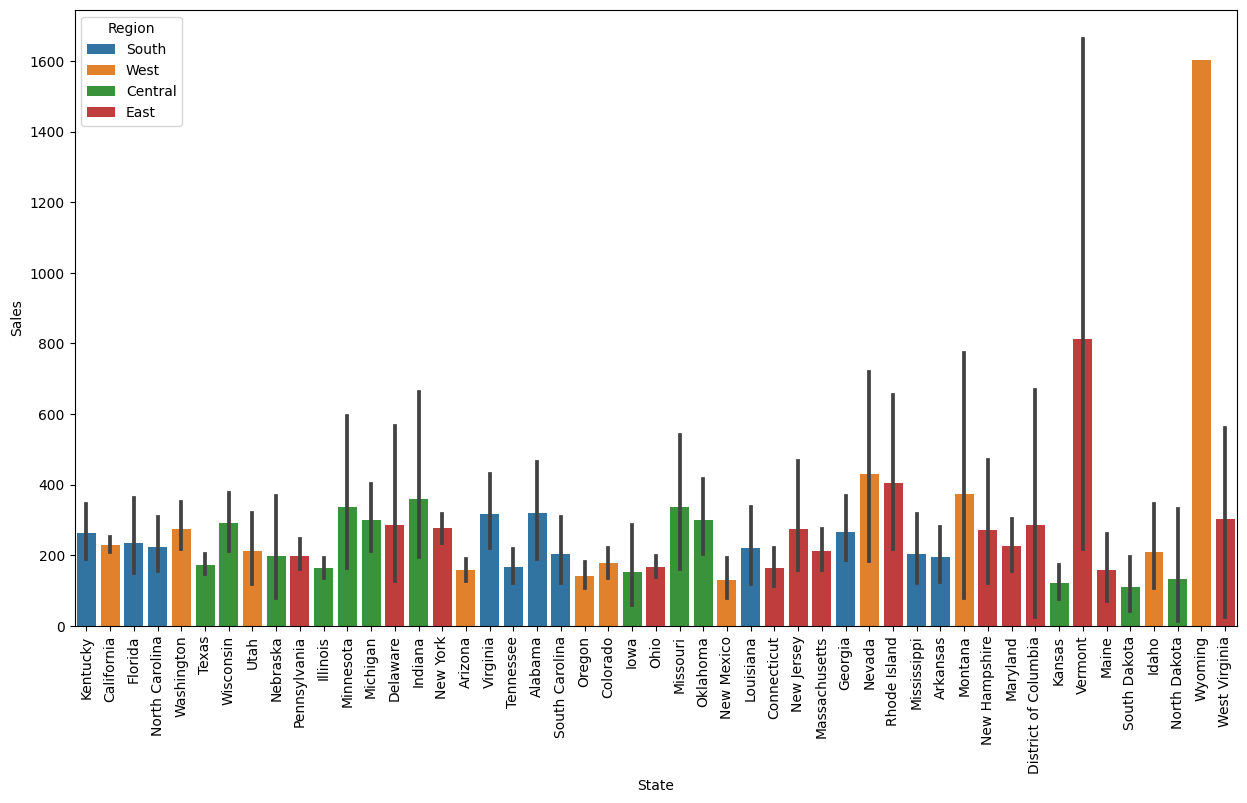

In [ ]:
# Import required libraries: pandas for data manipulation, matplotlib.pyplot for plotting, and seaborn for statistical data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the 'SampleSuperstore.csv' file into a DataFrame 'new_sales'
new_sales = pd.read_csv('SampleSuperstore.csv')

# Create a bar plot using seaborn's barplot function
# 'State' is plotted on the x-axis, 'Sales' on the y-axis, and 'Region' is used as the hue (color) for distinguishing regions
# Dodge is set to False to allow bars of different regions to be plotted side by side

# Set the figure size for better visualization
plt.figure(figsize=(15, 8))

# The resulting plot object 'g' is used for further customization
g = sns.barplot(x='State', y='Sales', data=new_sales, hue='Region', dodge=False)

# Rotate x-axis labels by 90 degrees for better readability
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Display the plot
plt.show()



In [ ]:
# Extract a subset of the DataFrame 'data' containing only the 'State' and 'Region' columns
state_region = data[['State', 'Region']]

# Drop duplicated values to keep unique combinations of 'State' and 'Region'
state_region = state_region.drop_duplicates()

# Display the resulting DataFrame 'state_region' with unique combinations of 'State' and 'Region'
state_region

# Merge the 'new_sales' DataFrame with the 'state_region' DataFrame based on the common 'State' column
# This helps associate each record in 'new_sales' with its corresponding 'Region'
new_sales = pd.merge(new_sales, state_region)

# The resulting 'new_sales' DataFrame now includes the 'Region' information for each 'State'
# This is achieved by merging with the 'state_region' DataFrame based on the common 'State' column


In [ ]:
# Group the 'data' DataFrame by 'State' and calculate the total 'Sales' for each state using the sum() method
# Create a new DataFrame 'new_sales' to store the aggregated sales information, sorting by 'Sales' in descending order

new_sales = pd.DataFrame(data.groupby('State').sum()['Sales']).sort_values(by='Sales', ascending=False)

# Reset the index of the DataFrame to make 'State' a regular column instead of an index
new_sales.reset_index(inplace=True)

# Display the first few rows of the 'new_sales' DataFrame to show the top states by total sales
new_sales.head()


,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


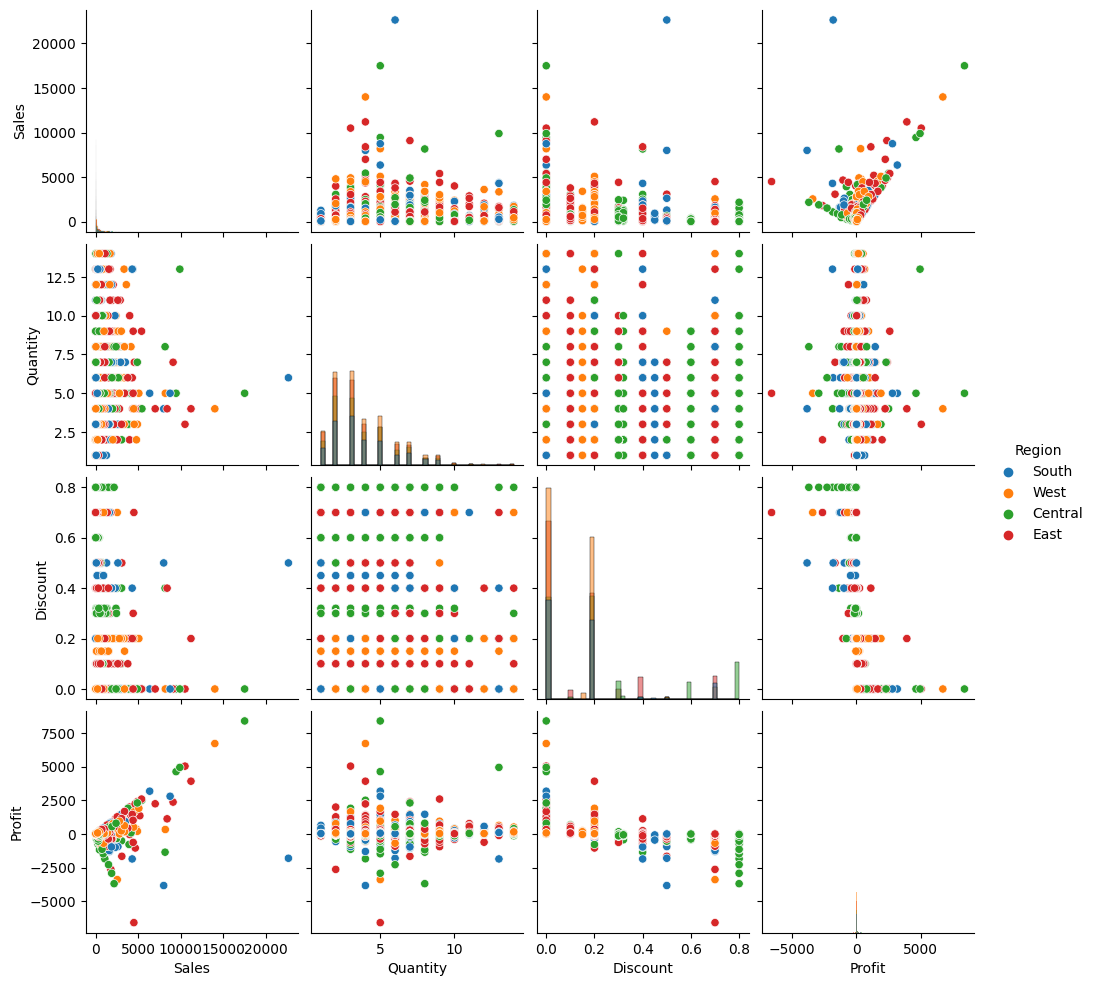

In [ ]:
# Use seaborn's pairplot to create a grid of scatterplots and histograms for numeric columns in the DataFrame 'data'
# 'hue' is set to 'Region' to color points based on the region
# 'diag_kind' is set to "hist" to display histograms on the diagonal

sns.pairplot(data, hue='Region', diag_kind="hist")


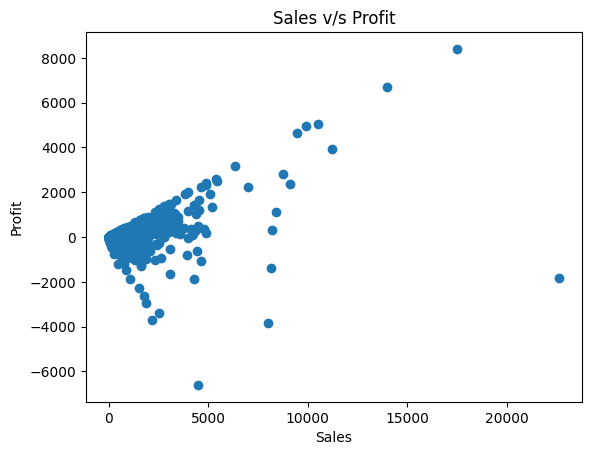

In [ ]:
# Create a scatter plot using matplotlib, with 'Sales' on the x-axis and 'Profit' on the y-axis
plt.scatter(df['Sales'], df['Profit'])

# Set the x-axis label to 'Sales'
plt.xlabel('Sales')

# Set the y-axis label to 'Profit'
plt.ylabel('Profit')

# Set the title of the plot to 'Sales v/s Profit'
plt.title('Sales v/s Profit')

# Display the plot
plt.show()


**LSTM**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# The code imports NumPy for numerical operations, pandas for data manipulation,
# matplotlib.pyplot for plotting, MinMaxScaler for scaling data, and
# Sequential, LSTM, and Dense from TensorFlow's Keras for building a simple neural network with LSTM layer.


In [ ]:
df = pd.read_csv('SampleSuperstore.csv')

In [ ]:
# Extract the relevant time series data (assuming 'Sales' is the column to be forecasted)
data = df['Sales'].values.reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Define a function to create input sequences for the LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
# Set the number of time steps (adjust as needed)
time_steps = 10

# Create input sequences for the LSTM
X, y = create_dataset(data_normalized, time_steps)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Make predictions on the last portion of the data (for simplicity)
test_data = data_normalized[-time_steps:]
test_data = test_data.reshape(1, time_steps, 1)
predicted_values = []

# Generate predictions step by step
for i in range(time_steps):
    predicted_value = model.predict(test_data)
    predicted_values.append(predicted_value[0, 0])
    test_data = np.append(test_data[:, 1:, :], [[[predicted_value[0, 0]]]], axis=1)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

Epoch 1/100
312/312 [==============================] - 9s 11ms/step - loss: 7.7030e-04
Epoch 2/100
312/312 [==============================] - 5s 17ms/step - loss: 7.6297e-04
Epoch 3/100
312/312 [==============================] - 6s 19ms/step - loss: 7.6395e-04
Epoch 4/100
312/312 [==============================] - 5s 17ms/step - loss: 7.6009e-04
Epoch 5/100
312/312 [==============================] - 5s 17ms/step - loss: 7.6181e-04
Epoch 6/100
312/312 [==============================] - 3s 11ms/step - loss: 7.6207e-04
Epoch 7/100
312/312 [==============================] - 3s 11ms/step - loss: 7.6036e-04
Epoch 8/100
312/312 [==============================] - 4s 12ms/step - loss: 7.6188e-04
Epoch 9/100
312/312 [==============================] - 7s 21ms/step - loss: 7.6075e-04
Epoch 10/100
312/312 [==============================] - 4s 12ms/step - loss: 7.6097e-04
Epoch 11/100
312/312 [==============================] - 4s 12ms/step - loss: 7.6108e-04
Epoch 12/100
312/312 [===================

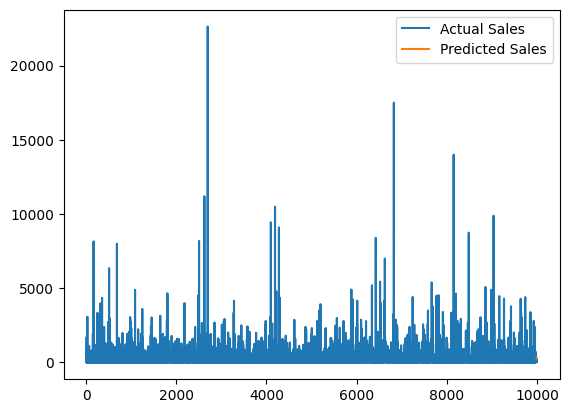

In [ ]:
# Plot the actual and predicted values
plt.plot(df['Sales'].values, label='Actual Sales')
plt.plot(np.arange(len(df['Sales']), len(df['Sales']) + time_steps), predicted_values, label='Predicted Sales')
plt.legend()
plt.show()

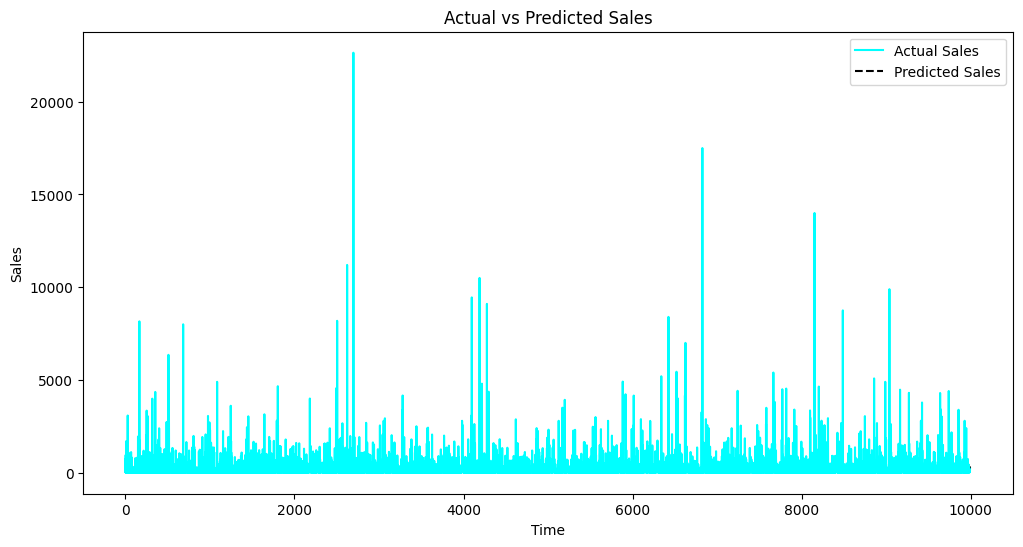

In [ ]:
# Plot using a simple line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Actual Sales', color='cyan')
plt.plot(np.arange(len(df['Sales']), len(df['Sales']) + time_steps), predicted_values, label='Predicted Sales', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [ ]:
# Assuming 'data_normalized' is your normalized time series data
train_size = int(len(data_normalized) * 0.8)  # 80% for training, 20% for validation
train, validation = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

In [ ]:
# Assuming you have the 'create_dataset' function
X_val, y_val = create_dataset(validation, time_steps)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [ ]:
# Assuming your model is named 'model'
validation_loss = model.evaluate(X_val, y_val)
print("Validation Loss:", validation_loss)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

63/63 [==============================] - 3s 10ms/step - loss: 7.8871e-04
Validation Loss: 0.0007887135143391788


In [ ]:
# Assuming 'y_val' contains the true values for the validation set
y_val_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

63/63 [==============================] - 1s 8ms/step
Mean Absolute Error (MAE): 0.01348959795537762
Root Mean Squared Error (RMSE): 0.028084042286890504
R-squared: -0.009381408807227487


In summary, the model's performance, as assessed by these metrics, may not be satisfactory. The negative R-squared indicates that the model's predictions are not capturing the variance in the target variable well.


**ARIMA**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime

# Set matplotlib to display plots inline in Jupyter Notebooks
%matplotlib inline

# The code imports NumPy for numerical operations, pandas for data manipulation,
# matplotlib.pyplot and seaborn for plotting, os for interacting with the operating system,
# scipy for scientific and technical computing, warnings to filter out warnings,
# datetime for working with dates and times, and sets %matplotlib inline for inline plotting in Jupyter Notebooks.


In [ ]:
#installing ARIMA
!pip install pmdarima

In [ ]:
# Import the pmdarima library for auto_arima modeling
import pmdarima as pmd

# Define a function named 'arimamodel' that takes a time series array as input
def arimamodel(timeseriesarray):
    # Use pmd.auto_arima to automatically select ARIMA model parameters
    # start_p and start_q set the initial values for the AR and MA components
    # test="adf" specifies the Augmented Dickey-Fuller test for stationarity
    # trace=True displays the search process
    autoarima_model = pmd.auto_arima(timeseriesarray,
                                     start_p=1,
                                     start_q=1,
                                     test="adf",
                                     trace=True)

    # Return the fitted auto_arima model
    return autoarima_model


In [ ]:
# Select a subset of columns from the DataFrame 'df' for analysis
columns_for_analysis = ['Discount', 'Sales', 'Quantity', 'Discount', 'Profit', 'Category', 'City', 'Sales']

# Create a new DataFrame 'df_selected' containing only the selected columns
df_selected = df[columns_for_analysis]

# Extract the 'Profit' column as the independent variable 'x'
x = df_selected[['Profit']]

# Extract the 'Sales' column as the dependent variable 'y'
y = df_selected['Sales']


In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# x_train: independent variable for training
# x_test: independent variable for testing
# y_train: dependent variable for training
# y_test: dependent variable for testing
# random_state=0: set a fixed random seed for reproducibility
# test_size=0.2: allocate 20% of the data to the testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


In [ ]:
# Convert all columns in the DataFrame 'df' to numeric values, replacing any non-numeric values with NaN
df = df.apply(pd.to_numeric, errors='coerce')



In [ ]:
# Print the lengths of the training and testing sets for independent and dependent variables
print(len(x_train))  # Length of x_train (independent variable) for training
print(len(x_test))   # Length of x_test (independent variable) for testing
print(len(y_train))  # Length of y_train (dependent variable) for training
print(len(y_test))   # Length of y_test (dependent variable) for testing


7995
1999
7995
1999


In [ ]:
# Import the SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

# Use the imputer to fill missing values in the training set for the independent variable 'x_train'
x_train_imputed = imputer.fit_transform(x_train)


**RANDOM FOREST REGRESSOR**

In [ ]:
# Import the RandomForestRegressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor instance
random_forest_regressor = RandomForestRegressor()

# Fit the model using the imputed training set for independent variable 'x_train_imputed' and the training set for dependent variable 'y_train'
random_forest_regressor.fit(x_train_imputed, y_train)


RandomForestRegressor()

In [ ]:
# Use the previously created imputer to fill missing values in the testing set for the independent variable 'x_test'
x_test_imputed = imputer.transform(x_test)


In [ ]:
# Import the RandomForestRegressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor instance with 100 estimators and a fixed random state
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using the imputed training set for independent variable 'x_train_imputed' and the training set for dependent variable 'y_train'
rfc.fit(x_train_imputed, y_train)

# Predict the dependent variable for the imputed testing set 'x_test_imputed'
y_pred = rfc.predict(x_test_imputed)


In [ ]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared and Mean Squared Error using the true values 'y_test' and predicted values 'y_pred'
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the calculated metrics
print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.7703648078014801
Mean Squared Error: 112387.1368890594


Based on the available features, the Random Forest Regressor model explains almost 77% of the variance in the target variable (Sales), according to the R-squared value of roughly 0.77. A value nearer 1 denotes a better fit. R-squared is a measure of how closely the anticipated values match the actual values.


The average of the squared differences between the anticipated and actual values is represented by the Mean Squared Error (MSE), which is around 112387.14. Better model performance is indicated by lower MSE values, however how this is interpreted will vary depending on the target variable's scale. In this situation, you might want to think about the context of your data to decide if this degree of mistake is appropriate or not.

Overall, an R-squared of 0.77 suggests a reasonably good fit for your model,


In [ ]:
# Import the pmdarima library for auto_arima modeling
import pmdarima as pmd

# Define a function named 'arimamodel' that takes a time series array as input
def arimamodel(timeseriesarray):
    # Use pmd.auto_arima to automatically select ARIMA model parameters
    # start_p and start_q set the initial values for the AR and MA components
    # test="adf" specifies the Augmented Dickey-Fuller test for stationarity
    # trace=True displays the search process
    autoarima_model = pmd.auto_arima(timeseriesarray,
                                     start_p=1,
                                     start_q=1,
                                     test="adf",
                                     trace=True)

    # Return the fitted auto_arima model
    return autoarima_model


In [ ]:
# Convert all columns in the DataFrame 'df' to numeric values, replacing any non-numeric values with NaN
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Fit an ARIMA model using the defined 'arimamodel' function on the imputed training set for 'x_train_imputed'
arima_model = arimamodel(x_train_imputed)

# Display the summary of the ARIMA model
arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=108673.122, Time=3.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108669.435, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108671.186, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108671.182, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108791.650, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.657 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7995
Model:                        SARIMAX   Log Likelihood              -54332.717
Date:                Mon, 04 Dec 2023   AIC                         108669.435
Time:                        01:35:34   BIC                         108683.408
Sample:                             0   HQIC                        108674.217
                               - 7995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.0723      2.497     10.840      0.000      22.177      31.967
sigma2      4.681e+04     56.200    832.880      0.000    4.67e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):          45079363.93
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             4.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       370.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**DECISION TREE REGRESSOR**

In [ ]:
# Import the DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor instance with a fixed random state
decision_tree_reg = DecisionTreeRegressor(random_state=0)

# Fit the model using the imputed training set for independent variable 'x_train_imputed' and the training set for dependent variable 'y_train'
decision_tree_reg.fit(x_train_imputed, y_train)

# Predict the dependent variable for the imputed testing set 'x_test_imputed'
y_pred_tree = decision_tree_reg.predict(x_test_imputed)


In [ ]:
# Predict the dependent variable for the imputed testing set 'x_test_imputed' using the DecisionTreeRegressor model
y_pred_tree = decision_tree_reg.predict(x_test_imputed)

# Print the predicted values
print(y_pred_tree)


[[ 23.36   23.36 ]
 [ 45.92   45.92 ]
 [  8.448   8.448]
 ...
 [ 89.98   89.98 ]
 [ 57.568  57.568]
 [114.288 114.288]]


In [ ]:
# Print the actual values of the dependent variable for the testing set 'y_test'
print("Actual Values:", y_test)

# Print the predicted values of the dependent variable using the DecisionTreeRegressor model
print("Predicted Values:", y_pred_tree)


Actual Values:         Sales    Sales
7933   23.360   23.360
8657   22.660   22.660
9599   35.208   35.208
799   283.920  283.920
3813   19.824   19.824
...       ...      ...
2890   51.960   51.960
4890    8.820    8.820
2738   89.980   89.980
5981   19.860   19.860
6087   29.220   29.220

[1999 rows x 2 columns]
Predicted Values: [[ 23.36   23.36 ]
 [ 45.92   45.92 ]
 [  8.448   8.448]
 ...
 [ 89.98   89.98 ]
 [ 57.568  57.568]
 [114.288 114.288]]


In [ ]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared using the true values 'y_test' and predicted values 'y_pred_tree'
mse = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_tree)
print("R-squared:", r2)


Mean Squared Error: 132868.69599922717
R-squared: 0.7285158303030013
